# Made by: Tobias Schønau s224327

In [14]:
%reload_ext autoreload
%autoreload 2

In [15]:
import pandas as pd
import numpy as np
import dataloader
import modelController
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
loan = dataloader.LoanForest()
data = loan.get_data()
column_names = loan.column_names
X, y = dataloader.split_variables_and_target(data)




In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
y.sum() / len(y)

0.16007100344575545

In [18]:
import numpy as np
from scipy.stats import mode
from sklearn.tree import DecisionTreeClassifier
class MyRandomForestClassifier:
   def __init__(self, n_estimators=10, max_depth=None):
      self.n_estimators = n_estimators
      self.max_depth = max_depth
      self.trees = []
   def fit(self, X, y):
      n_samples, n_features = X.shape
      for _ in range(self.n_estimators):
         row_indices = np.random.choice(n_samples, n_samples, replace=True)
         n_selected_features = int(np.sqrt(n_features))
         feature_indices = np.random.choice(
            n_features, n_selected_features, replace=False)
         X_sample, y_sample = X[row_indices][:, feature_indices], y[row_indices]
         tree = DecisionTreeClassifier(max_depth=self.max_depth)
         tree.fit(X_sample, y_sample)
         self.trees.append((tree, feature_indices))
   def predict(self, X):
      predictions = np.array(
         [tree.predict(X[:, features])
         for tree, features in self.trees]
      ).T
      return mode(predictions, axis=1).mode.ravel()

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

random_forest_classifier = modelController.ModelController(RandomForestClassifier(n_estimators=100, min_samples_split=5))
random_forest_classifier.predict(data, 5)


ada_boost_classifier = modelController.ModelController(AdaBoostClassifier(n_estimators=100))
ada_boost_classifier.predict(data, 5)

gradient_boosting_classifier = modelController.ModelController(GradientBoostingClassifier(n_estimators=100))
gradient_boosting_classifier.predict(data, 5)

bagging_classifier = modelController.ModelController(BaggingClassifier(n_estimators=100))
bagging_classifier.predict(data, 5)

voting_classifier = modelController.ModelController(VotingClassifier(estimators=[('rf', random_forest_classifier.model), ('ada', ada_boost_classifier.model), ('gb', gradient_boosting_classifier.model), ('bc', bagging_classifier.model)]))
voting_classifier.predict(data, 5)




X_train shape: (12854, 13)
y_train shape: (12854,)
X_test shape: (1916, 13)
y_test shape: (1916,)
X_train head:    credit.policy  purpose  int.rate  installment  log.annual.inc    dti  fico  \
1              1        1    0.1071       228.22       11.082143  14.29   707   
2              1        2    0.1357       366.86       10.373491  11.63   682   
3              1        2    0.1008       162.34       11.350407   8.10   712   
4              1        1    0.1426       102.92       11.299732  14.97   667   
5              1        1    0.0788       125.13       11.904968  16.98   727   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   
5        6120.041667 

c:\Users\tobia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


X_train shape: (12840, 13)
y_train shape: (12840,)
X_test shape: (1916, 13)
y_test shape: (1916,)
X_train head:    credit.policy  purpose  int.rate  installment  log.annual.inc    dti  fico  \
1              1        1    0.1071       228.22       11.082143  14.29   707   
2              1        2    0.1357       366.86       10.373491  11.63   682   
3              1        2    0.1008       162.34       11.350407   8.10   712   
4              1        1    0.1426       102.92       11.299732  14.97   667   
5              1        1    0.0788       125.13       11.904968  16.98   727   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   
5        6120.041667 

c:\Users\tobia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


X_train shape: (12862, 13)
y_train shape: (12862,)
X_test shape: (1915, 13)
y_test shape: (1915,)
X_train head:    credit.policy  purpose  int.rate  installment  log.annual.inc    dti  fico  \
1              1        1    0.1071       228.22       11.082143  14.29   707   
2              1        2    0.1357       366.86       10.373491  11.63   682   
4              1        1    0.1426       102.92       11.299732  14.97   667   
8              1        4    0.1134        87.19       11.407565  17.25   682   
9              1        2    0.1221        84.12       10.203592  10.00   707   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
4        4066.000000       4740        39.5               0            1   
8        3989.000000      69909        51.1               1            0   
9        2730.041667 

c:\Users\tobia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


X_train shape: (12874, 13)
y_train shape: (12874,)
X_test shape: (1915, 13)
y_test shape: (1915,)
X_train head:     credit.policy  purpose  int.rate  installment  log.annual.inc    dti  \
3               1        2    0.1008       162.34       11.350407   8.10   
4               1        1    0.1426       102.92       11.299732  14.97   
5               1        1    0.0788       125.13       11.904968  16.98   
10              1        2    0.1347       360.43       10.434116  22.09   
12              1        2    0.0859       316.11       10.933107  15.49   

    fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
3    712        2699.958333      33667        73.2               1   
4    667        4066.000000       4740        39.5               0   
5    727        6120.041667      50807        51.0               0   
10   677        6713.041667      13846        71.0               2   
12   767        6519.958333       6068        16.7               0   

    delinq

c:\Users\tobia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


X_train shape: (12888, 13)
y_train shape: (12888,)
X_test shape: (1915, 13)
y_test shape: (1915,)
X_train head:    credit.policy  purpose  int.rate  installment  log.annual.inc    dti  fico  \
1              1        1    0.1071       228.22       11.082143  14.29   707   
2              1        2    0.1357       366.86       10.373491  11.63   682   
3              1        2    0.1008       162.34       11.350407   8.10   712   
4              1        1    0.1426       102.92       11.299732  14.97   667   
5              1        1    0.0788       125.13       11.904968  16.98   727   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   
5        6120.041667 

c:\Users\tobia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


X_train shape: (12858, 13)
y_train shape: (12858,)
X_test shape: (1916, 13)
y_test shape: (1916,)
X_train head:    credit.policy  purpose  int.rate  installment  log.annual.inc    dti  fico  \
2              1        2    0.1357       366.86       10.373491  11.63   682   
3              1        2    0.1008       162.34       11.350407   8.10   712   
4              1        1    0.1426       102.92       11.299732  14.97   667   
5              1        1    0.0788       125.13       11.904968  16.98   727   
9              1        2    0.1221        84.12       10.203592  10.00   707   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   
5        6120.041667      50807        51.0               0            0   
9        2730.041667 

c:\Users\tobia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


X_train shape: (12920, 13)
y_train shape: (12920,)
X_test shape: (1916, 13)
y_test shape: (1916,)
X_train head:    credit.policy  purpose  int.rate  installment  log.annual.inc    dti  fico  \
1              1        1    0.1071       228.22       11.082143  14.29   707   
2              1        2    0.1357       366.86       10.373491  11.63   682   
3              1        2    0.1008       162.34       11.350407   8.10   712   
8              1        4    0.1134        87.19       11.407565  17.25   682   
9              1        2    0.1221        84.12       10.203592  10.00   707   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
8        3989.000000      69909        51.1               1            0   
9        2730.041667 

c:\Users\tobia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


X_train shape: (12834, 13)
y_train shape: (12834,)
X_test shape: (1915, 13)
y_test shape: (1915,)
X_train head:    credit.policy  purpose  int.rate  installment  log.annual.inc    dti  fico  \
1              1        1    0.1071       228.22       11.082143  14.29   707   
2              1        2    0.1357       366.86       10.373491  11.63   682   
3              1        2    0.1008       162.34       11.350407   8.10   712   
4              1        1    0.1426       102.92       11.299732  14.97   667   
5              1        1    0.0788       125.13       11.904968  16.98   727   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   
5        6120.041667 

c:\Users\tobia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


X_train shape: (12928, 13)
y_train shape: (12928,)
X_test shape: (1915, 13)
y_test shape: (1915,)
X_train head:    credit.policy  purpose  int.rate  installment  log.annual.inc    dti  fico  \
2              1        2    0.1357       366.86       10.373491  11.63   682   
3              1        2    0.1008       162.34       11.350407   8.10   712   
4              1        1    0.1426       102.92       11.299732  14.97   667   
5              1        1    0.0788       125.13       11.904968  16.98   727   
8              1        4    0.1134        87.19       11.407565  17.25   682   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   
5        6120.041667      50807        51.0               0            0   
8        3989.000000 

c:\Users\tobia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


X_train shape: (12814, 13)
y_train shape: (12814,)
X_test shape: (1915, 13)
y_test shape: (1915,)
X_train head:    credit.policy  purpose  int.rate  installment  log.annual.inc    dti  fico  \
1              1        1    0.1071       228.22       11.082143  14.29   707   
2              1        2    0.1357       366.86       10.373491  11.63   682   
3              1        2    0.1008       162.34       11.350407   8.10   712   
4              1        1    0.1426       102.92       11.299732  14.97   667   
5              1        1    0.0788       125.13       11.904968  16.98   727   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   
5        6120.041667 

c:\Users\tobia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [20]:
models = [random_forest_classifier, ada_boost_classifier, gradient_boosting_classifier, bagging_classifier, voting_classifier]

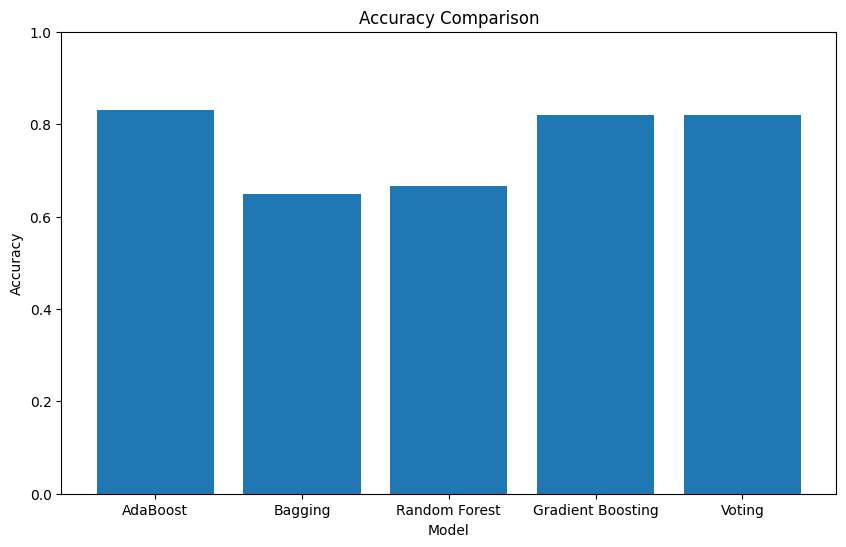

In [21]:
import matplotlib.pyplot as plt

# Accuracy values
accuracy_values = [model.accuracy_avg for model in models]
# Model names
model_names = ['AdaBoost', 'Bagging', 'Random Forest', 'Gradient Boosting', 'Voting']

# Create the graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0, 1.0)  # Set the y-axis limits if needed
plt.show()


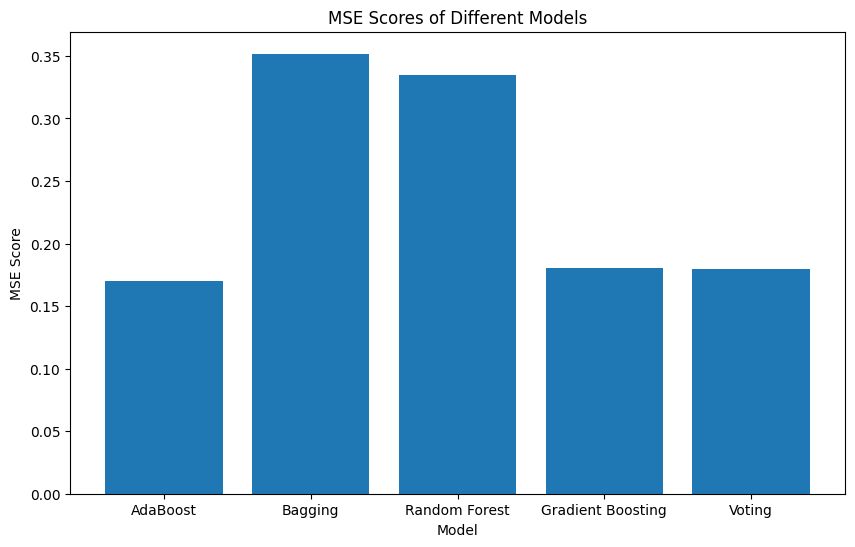

In [22]:
import matplotlib.pyplot as plt

mse_scores = [model.mse_avg for model in models]

# Create a list of labels for the x-axis
labels= ['AdaBoost', 'Bagging', 'Random Forest', 'Gradient Boosting', 'Voting']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, mse_scores)

# Add labels and title

plt.xlabel('Model')
plt.ylabel('MSE Score')
plt.title('MSE Scores of Different Models')

# Display the plot
plt.show()

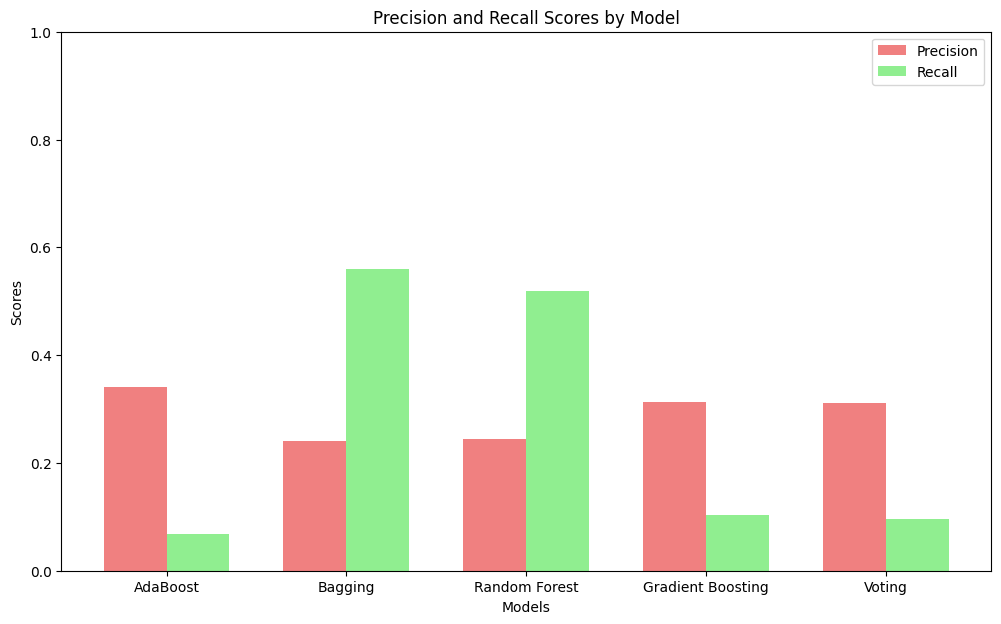

In [23]:
import numpy as np

precision_scores = [model.precision_avg for model in models] 
recall_scores = [model.recall_avg for model in models]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(x - width/2, precision_scores, width, label='Precision', color='lightcoral')
ax.bar(x + width/2, recall_scores, width, label='Recall', color='lightgreen')
ax.set_ylim(0, 1)
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall Scores by Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()

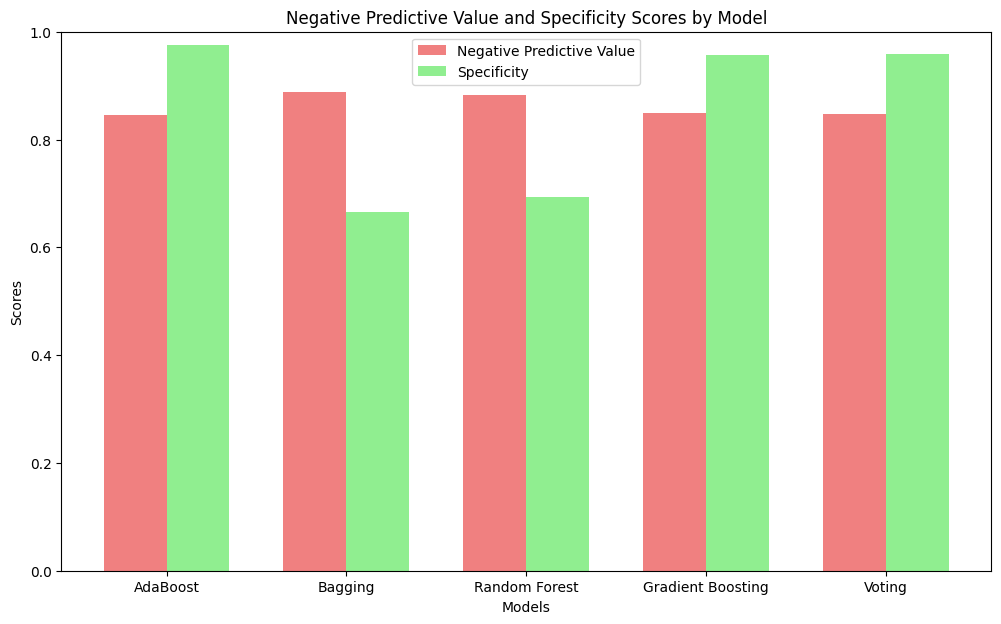

In [24]:
import numpy as np

precision_scores = [model.negative_predictive_value_avg for model in models] 
recall_scores = [model.specificity_avg for model in models]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(x - width/2, precision_scores, width, label='Negative Predictive Value', color='lightcoral')
ax.bar(x + width/2, recall_scores, width, label='Specificity', color='lightgreen')
ax.set_ylim(0, 1)
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Negative Predictive Value and Specificity Scores by Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()

In [25]:
""" import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data

true_positive_scores = [model.true_positive_avg for model in models]  
true_negative_scores = [model.true_negative_avg for model in models]
false_positive_scores = [5, 8, 7, 6, 9]  # Example scores
false_negative_scores = [10, 12, 11, 9, 10]  # Example scores

confusion_matrices = [
    [[tp, fp], [fn, tn]] for tp, fp, fn, tn in zip(true_positive_scores, false_positive_scores, false_negative_scores, true_negative_scores)
]

# Create a figure with multiple subplots for confusion matrices
fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # Adjust figsize as needed

for i, cm in enumerate(confusion_matrices):
    row = i // 3
    col = i % 3
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[row, col])
    axs[row, col].set_title(f'Confusion Matrix for {model_names[i]}')
    axs[row, col].set_xlabel('Predicted')
    axs[row, col].set_ylabel('Actual')
import matplotlib.pyplot as plt
import seaborn as sns

# Example scores for a single model
true_positive_score = 55  # Example score
true_negative_score = 48  # Example score
false_positive_score = 7  # Example score
false_negative_score = 11  # Example score

# Confusion matrix for the single model
confusion_matrix = [[true_positive_score, false_positive_score],
                    [false_negative_score, true_negative_score]]

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Single Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Hide the unused subplot
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()
 """

" import matplotlib.pyplot as plt\nimport seaborn as sns\nimport numpy as np\n\n# Example data\n\ntrue_positive_scores = [model.true_positive_avg for model in models]  \ntrue_negative_scores = [model.true_negative_avg for model in models]\nfalse_positive_scores = [5, 8, 7, 6, 9]  # Example scores\nfalse_negative_scores = [10, 12, 11, 9, 10]  # Example scores\n\nconfusion_matrices = [\n    [[tp, fp], [fn, tn]] for tp, fp, fn, tn in zip(true_positive_scores, false_positive_scores, false_negative_scores, true_negative_scores)\n]\n\n# Create a figure with multiple subplots for confusion matrices\nfig, axs = plt.subplots(2, 3, figsize=(18, 12))  # Adjust figsize as needed\n\nfor i, cm in enumerate(confusion_matrices):\n    row = i // 3\n    col = i % 3\n    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[row, col])\n    axs[row, col].set_title(f'Confusion Matrix for {model_names[i]}')\n    axs[row, col].set_xlabel('Predicted')\n    axs[row, col].set_ylabel('Actual')\nimport matplo

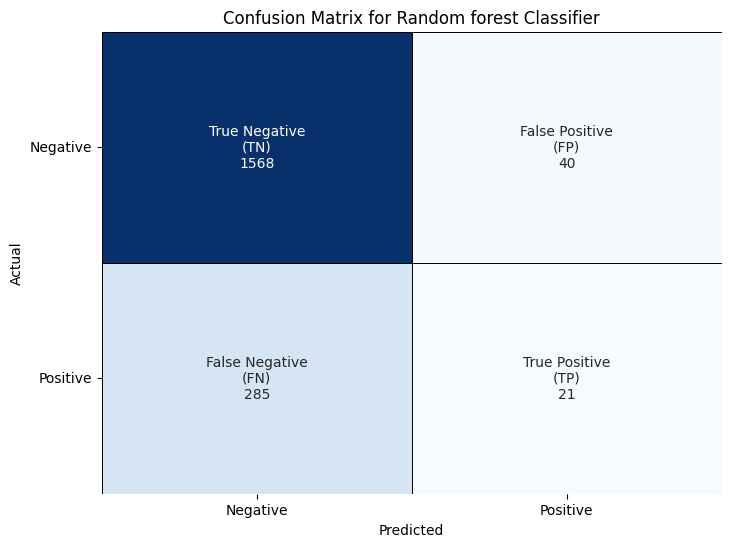

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example scores for a single model
true_positive_score = random_forest_classifier.true_positive_avg 
true_negative_score = random_forest_classifier.true_negative_avg
false_positive_score = random_forest_classifier.false_positive_avg
false_negative_score = random_forest_classifier.false_negative_avg

# Confusion matrix for the single model
confusion_matrix = np.array([[true_negative_score, false_positive_score],
                             [false_negative_score, true_positive_score]])

# Define the labels
labels = np.array([['True Negative\n(TN)\n'+str(true_negative_score), 'False Positive\n(FP)\n'+str(false_positive_score)],
                   ['False Negative\n(FN)\n'+str(false_negative_score), 'True Positive\n(TP)\n'+str(true_positive_score)]])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black')
plt.title('Confusion Matrix for Random forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'], rotation=0)
plt.show()
